# Performance Measures

## For each hedge fund style — and using Python— calculate and interpret the following performance measures:
(i) annualized arithmetic average return;

(ii) annualized geometric average return;

(iii) annualized volatility of excess returns;

(iv) annualized Sharpe ratio;

(v) market beta;

(vi) annualized alpha to the market;

(vii) annualized information ratio;

(viii) maximum drawdown;

(ix) skewness of monthly excess returns;

(x) excess kurtosis of monthly excess returns

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp

In [52]:
def annualized_arithmetic_average_return(returns):
    """
    Simple average of return annualized 
    """

    arithmetic_average_return = np.mean(returns)
    return arithmetic_average_return * 12

def annualized_geometric_average_return(returns):
    """
    Average of return accounting for compounding 
    """

    geometric_average = np.prod(1 + returns)
    return geometric_average ** (12 / len(returns)) - 1

def annualized_volatility_excess_returns(excess_returns):
    """
    Riskiness of the fund relative to the risk-free rate
    """

    return np.sqrt(12) * np.std(excess_returns)

def annualized_sharpe_ratio(excess_returns):
    """
    Sharpe Ratio tells us how much excess return we are getting for the risk we are taking on (1 is good performance, 0 is poor)
    """

    average_excess_return = np.mean(excess_returns)
    excess_return_standard_deviation = np.std(excess_returns)

    sharpe_ratio = average_excess_return / excess_return_standard_deviation
    return (12 ** 0.5) * sharpe_ratio

def market_beta(fund_excess_returns, market_excess_returns):
    """
    Indicates fund's sensitivity to market movements (Greater than 1: More volatile than market, less than 1: Less volatile)
    """

    covariance = np.cov(fund_excess_returns, market_excess_returns)[0][1] 
    market_variance = np.var(market_excess_returns)

    return covariance / market_variance

def annualized_alpha_to_market(fund_excess_returns, market_excess_returns):
    """
    Performance of the fund relative to the market on risk-adjusted basis (Positive alpha: Outperforming the market, Negative alpha: Underperforming the market)
    """

    fund_average_excess_return = np.mean(fund_excess_returns)
    market_average_excess_return = np.mean(market_excess_returns)

    beta = market_beta(fund_excess_returns, market_excess_returns)
    alpha = fund_average_excess_return - beta * market_average_excess_return

    return alpha * 12

def annualized_information_ratio(fund_excess_returns, market_excess_returns):
    """
    Information Ratio = Average Relative Return/Tracking Error
    Annualized Information Ratio = SQRT (Number of Time Units Per Year/Number of Time Units Per Sub Period) X Information Ratio
    """

    fund_relative_return = fund_excess_returns - market_excess_returns
    average_fund_relative_return = np.mean(fund_relative_return)

    tracking_error = fund_relative_return.std()

    return (12 ** 0.5) * average_fund_relative_return / tracking_error

def max_drawdown(fund_excess_returns):
    """
    Max Drawdown = Max (Peak Value - Trough Value) / Peak Value
    """

    max_drawdown = 0
    peak_value = 1
    cumulative_return = 1

    for hedge_fund_return in fund_excess_returns:
        cumulative_return *= 1 + hedge_fund_return
        peak_value = max(peak_value, cumulative_return)
        drawdown = (peak_value - cumulative_return) / peak_value
        max_drawdown = max(max_drawdown, drawdown)

    return max_drawdown

def skewness_monthly_excess_returns(fund_excess_returns):
    return sp.stats.skew(fund_excess_returns)

def excess_kurtosis_monthly_excess_returns(fund_excess_returns):
    """
    Excess Kurtosis = Kurtosis - 3
    """
    kurtosis = sp.stats.kurtosis(fund_excess_returns)

    return kurtosis - 3

In [53]:
data = pd.read_excel('data/Performance_Measurement_Spreadsheet.xlsx')

hedge_funds = ['Ln/Sh Eq Hedge Fund USD', 'Eq Mkt Ntr Hedge Fund USD', 'Ded Sh Bs Hedge Fund USD', 'Global Mac Hedge Fund USD', 'Mngd Fut Hedge Fund USD', 'Emg Mkts Hedge Fund USD', 'Evnt Drvn Hedge Fund USD', 'Cnvrt Arb Hedge Fund USD', 'Fx Inc Arb Hedge Fund USD', 'DJCS Hedge Fund USD']
market_excess_returns = data['Mkt-RF']
risk_free_rates = data['RF']

df = pd.DataFrame()

for hedge_fund in hedge_funds:
    hedge_fund_returns = data[hedge_fund]
    hedge_fund_excess_returns = hedge_fund_returns - risk_free_rates

    df[hedge_fund] = [annualized_arithmetic_average_return(hedge_fund_returns), 
                      annualized_geometric_average_return(hedge_fund_returns), 
                      annualized_volatility_excess_returns(hedge_fund_excess_returns),
                      annualized_sharpe_ratio(hedge_fund_excess_returns),
                      market_beta(hedge_fund_excess_returns, market_excess_returns),
                      annualized_alpha_to_market(hedge_fund_excess_returns, market_excess_returns),
                      annualized_information_ratio(hedge_fund_excess_returns, market_excess_returns),
                      max_drawdown(hedge_fund_returns), 
                      skewness_monthly_excess_returns(hedge_fund_excess_returns),
                      excess_kurtosis_monthly_excess_returns(hedge_fund_excess_returns)]

df.index = ['Annualized Arithmetic Average Return', 'Annualized Geometric Average Return', 'Annualized Volatility of Excess Returns', 'Annualized Sharpe Ratio', 'Market Beta', 'Annualized Alpha to Market', 'Annualized Information Ratio', 'Max Drawdown', 'Skewness of Monthly Excess Returns', 'Excess Kurtosis of Monthly Excess Returns']

# Export to Excel
df.to_excel('output/performance_metrics.xlsx')

0.031548890993556636
0.04726077175344033
0.09162264819354143
0.04812050144312389
0.060526425079624024
0.04065677964638914
0.03706946085272336
0.042881950665416634
0.04378216532721323
0.03729274871087129


# Make the following plots for Global Mac Hedge Fund USD: (i) cumulative return; and (ii) drawdown.

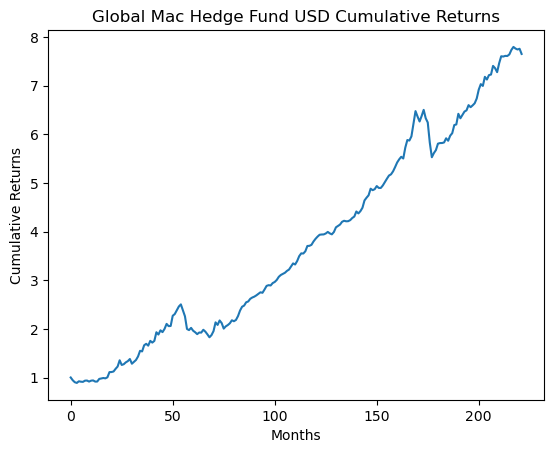

In [54]:
def cumulative_returns(hedge_fund_returns):
    return (1 + hedge_fund_returns).cumprod()

fund = 'Global Mac Hedge Fund USD'
hedge_fund_returns = data[fund]

cumulative_returns = cumulative_returns(hedge_fund_returns)
plt.plot(cumulative_returns)

plt.title(f"{fund} Cumulative Returns")
plt.xlabel('Months')
plt.ylabel('Cumulative Returns')
plt.show()


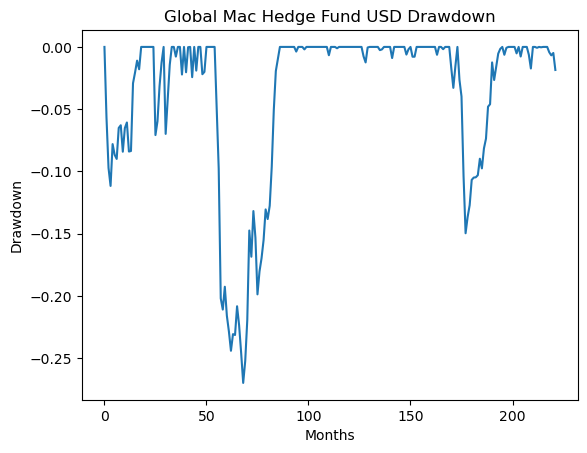

In [55]:
cumulative_max = cumulative_returns.cummax()
drawdown = (cumulative_returns - cumulative_max) / cumulative_max
plt.plot(drawdown)
plt.title(f"{fund} Drawdown")
plt.xlabel('Months')
plt.ylabel('Drawdown')
plt.show()

# Factor Models

For Ln/Sh Eq Hedge Fund USD, run two regressions: (i) a univariate regression of the
hedge fund index’s excess return on market excess return (i.e., CAPM), and (ii) a
multivariate regression on the market, size, value, and momentum factors (i.e., Carhart
four-factor). Interpret the loadings on the different factors. What do we learn about this
investment style?

In [56]:
import statsmodels.api as sm

def CAPM(hedge_fund_excess_returns, market_excess_returns):
    X = market_excess_returns
    y = hedge_fund_excess_returns

    X = sm.add_constant(X)

    model = sm.OLS(y, X).fit()

    return model.params[0], model.params[1]

fund = 'Ln/Sh Eq Hedge Fund USD'
hedge_fund_returns = data[fund]
market_returns = data['Mkt-RF']
risk_free_rates = data['RF']
hedge_fund_excess_returns = hedge_fund_returns - risk_free_rates

results = CAPM(hedge_fund_excess_returns, market_returns)

print(f"{fund} Alpha: {results[0]}, Beta: {results[1]}")

Ln/Sh Eq Hedge Fund USD Alpha: 0.0026598783659129497, Beta: 0.4596677500455535


/var/folders/3_/5yqvf0js6kn57hkj_5zvnlf40000gn/T/ipykernel_62056/2797689806.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return model.params[0], model.params[1]


In [57]:
def Carhart_4_factor(hedge_fund_excess_returns, market_excess_returns, SMB, HML, UMD):
    X = pd.DataFrame({'Market Excess Returns': market_excess_returns, 'SMB': SMB, 'HML': HML, 'UMD': UMD})
    y = hedge_fund_excess_returns

    X = sm.add_constant(X)

    model = sm.OLS(y, X).fit()

    return model.params[0], model.params[1], model.params[2], model.params[3], model.params[4]

fund = 'Ln/Sh Eq Hedge Fund USD'
hedge_fund_returns = data[fund]
market_returns = data['Mkt-RF']
risk_free_rates = data['RF']
hedge_fund_excess_returns = hedge_fund_returns - risk_free_rates
SMB = data['SMB']
HML = data['HML']
UMD = data['UMD']

results = Carhart_4_factor(hedge_fund_excess_returns, market_returns, SMB, HML, UMD)

print(f"{fund} Alpha: {results[0]}, Beta: {results[1]}, SMB: {results[2]}, HML: {results[3]}, UMD: {results[4]}")

Ln/Sh Eq Hedge Fund USD Alpha: 0.0016064684798429332, Beta: 0.46772159981135925, SMB: 0.17716745349182897, HML: -0.08262057971914881, UMD: 0.16637585402436691


/var/folders/3_/5yqvf0js6kn57hkj_5zvnlf40000gn/T/ipykernel_62056/2056698210.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return model.params[0], model.params[1], model.params[2], model.params[3], model.params[4]


Repeat the regressions in II.A for Ded Sh Bs Hedge Fund USD. Are these loadings
different from Ln/Sh Eq Hedge Fund USD? If yes, what do these loadings say about the
investment strategies between these two funds?

In [58]:
fund = 'Ded Sh Bs Hedge Fund USD'
hedge_fund_returns = data[fund]
market_returns = data['Mkt-RF']
risk_free_rates = data['RF']
hedge_fund_excess_returns = hedge_fund_returns - risk_free_rates

results = CAPM(hedge_fund_excess_returns, market_returns)

print(f"{fund} Alpha: {results[0]}, Beta: {results[1]}")

Ded Sh Bs Hedge Fund USD Alpha: -0.00039484323676367776, Beta: -0.8565652055227198


/var/folders/3_/5yqvf0js6kn57hkj_5zvnlf40000gn/T/ipykernel_62056/2797689806.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return model.params[0], model.params[1]


In [59]:
fund = 'Ded Sh Bs Hedge Fund USD'
hedge_fund_returns = data[fund]
market_returns = data['Mkt-RF']
risk_free_rates = data['RF']
hedge_fund_excess_returns = hedge_fund_returns - risk_free_rates
SMB = data['SMB']
HML = data['HML']
UMD = data['UMD']

results = Carhart_4_factor(hedge_fund_excess_returns, market_returns, SMB, HML, UMD)

print(f"{fund} Alpha: {results[0]}, Beta: {results[1]}, SMB: {results[2]}, HML: {results[3]}, UMD: {results[4]}")

Ded Sh Bs Hedge Fund USD Alpha: -0.0004142454695830809, Beta: -0.7850597388009416, SMB: -0.27694039228736983, HML: 0.13565711077408346, UMD: -0.009491832282023818


/var/folders/3_/5yqvf0js6kn57hkj_5zvnlf40000gn/T/ipykernel_62056/2056698210.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return model.params[0], model.params[1], model.params[2], model.params[3], model.params[4]


# Illiquidity and Stale Prices

Using excess returns on Cnvrt Arb Hedge Fund USD, compare:

(i) the beta in a monthly univariate regression on the market’s excess return;

(ii) the beta in a univariate regression on the market using 3-month excess returns;

(iii) the sum of betas in a monthly regression on the market, the 1-month lagged market, and the 2-month lagged market (all excess returns).

Note: To compute 3-month excess returns in a simplified way, add three monthly
excess returns. The regression coefficients can still be estimated by running the
regression monthly (i.e., with overlapping data), but, in this case, t-statistics need to be
adjusted if you were to consider these

In [60]:
fund = 'Ln/Sh Eq Hedge Fund USD'
hedge_fund_returns = data[fund] - data['RF']
market_returns = data['Mkt-RF']
risk_free_rates = data['RF']

results = CAPM(hedge_fund_returns, market_returns)
print(f"{fund} Beta: {results[1]}")

Ln/Sh Eq Hedge Fund USD Beta: 0.4596677500455535


/var/folders/3_/5yqvf0js6kn57hkj_5zvnlf40000gn/T/ipykernel_62056/2797689806.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return model.params[0], model.params[1]


In [61]:
fund = 'Ln/Sh Eq Hedge Fund USD'
hedge_fund_returns = (data[fund] - data['RF']).rolling(window=3).sum().dropna()
market_returns = data['Mkt-RF'].rolling(window=3).sum().dropna()

results = CAPM(hedge_fund_returns, market_returns)
print(f"{fund} Beta: {results[1]}")

Ln/Sh Eq Hedge Fund USD Beta: 0.5099406731100637


/var/folders/3_/5yqvf0js6kn57hkj_5zvnlf40000gn/T/ipykernel_62056/2797689806.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return model.params[0], model.params[1]
